# Data visualization for only one apartment _ hourly time series

<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> This notebook permits the visualization the Domestic Hot Water (DHW) for a specific apartment in the dataset over a designated period, in this case, a five-day period. The data is resampled to one hour for each day. Then we visualize the consumption over the selected timeframe.
</div>

<div class="alert alert-info">
<strong>Note :</strong><br>
This notebook is relevant to visualize the consumption of each apartments.  
    The value can vary within these apartments' number: 25, 26, 27, 34, 35, 36, 63, 64, 67 and 9.
</div>

The `pandas` module facilitates data analysis and the use of dataframes. You can find the library's documentation [there.]( https://pandas.pydata.org/docs/)  
The `matplotlib.pyplot` module is utilized to visualize the data. You can find the library's documentation [there.](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)  
Finally, the `DHW_Data_analysis` code was made by Christian Ghiaus and is used for data preprocessing and generating plot. You can find the code in the folder. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import DHW_Data_analysis as data #Made by Christian Ghiaus

Set the size of the figure

In [2]:
plt.rcParams["figure.figsize"] = (8, 6)                         # inch
plt.rcParams["figure.figsize"] = data.cm2inch(8 * 2.54, 6 * 2.54)    # cm

fig_no = 0   # figure number

The required Domestic Hot Water (DHW) files end with "-IECS", this designation indicates data related to DHW.  
The required electrical consumption files end with '-EC', this indicates data related to the electrical consumption linked to the DHW consumption.  
The os module is utilized to compile a list of DHW data for all apartments.  
The `files2df` is a function of the `DHW_Data_Analysis` module to retrieve demand data. We utilize the parameter `file_type` to specify the apartment we wish to visualize, with the option to vary it among different apartments. In the provided example, the apartment 9 is specified but it can substituted with any of the apartments: 25, 26, 27, 34, 35, 36, 63, 64 and 67 individually. The color blue represents the electrical power and the red line represents the DHW consumption.   
Then we use the `resample` function of the `pandas` module to get an hour interval.  
Lastly, the value are plotted using the `plot_time` function from the `DHW_Data_Analysis` module, specifying the start and end dates for the chosen apartment.

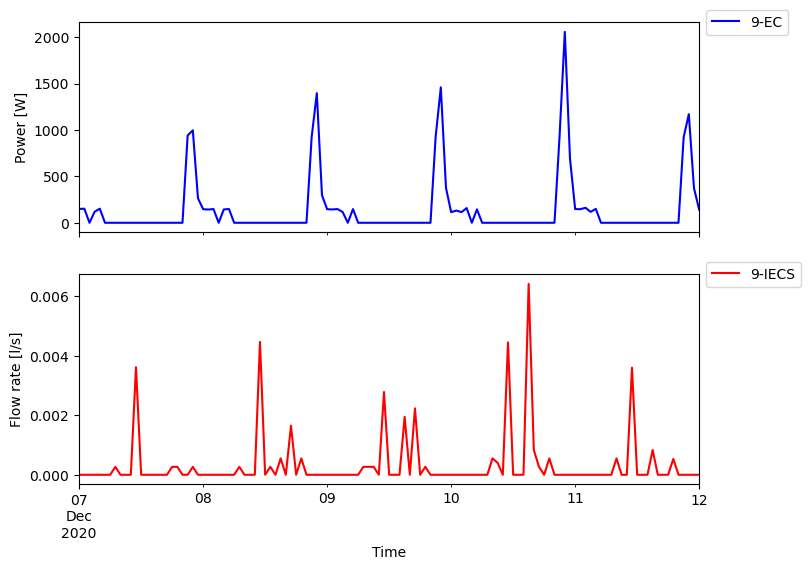

In [3]:
#Get the data with a resample for 10Min + Remove Nan values
df_e = data.files2df(file_type='9-EC', sampling_time='10Min')
df_w = data.files2df(file_type='9-IECS', sampling_time='10Min')
df_em, df_wm= df_e, df_w

# Defining the period of visualization giving the departure date to the arrival date
start, end = '2020-12-07 00:00', '2020-12-12 00:00'

#Resampling for an hour analysis
df_em=df_e.resample("H").mean()
df_wm=df_w.resample("H").mean()

 
#Plot the hourly values from the starting date to the end one for the apartment
data.plot_time(df_em[start:end], df_wm[ start:end], legend='True')
plt.show()
